# Phase Diagram calculations at Mauna Loa

- Given a set composition we can use `ptt` to assess the phase stability at different P-T conditions to construct a phase diagram.
- These calculations can be performed with either the MELTS or Holland & Powell family of thermodynamic models (through MAGEMin).
- Also use outputs to assess the variability in key geochemical parameters across P-T space (e.g., phase proportions or chemistry).


**Before any calculations can be run** users need to download the alphaMELTS for MATLAB files and/or install the MAGEMinCalc and juliacall packages. Please see the installation guide on ReadTheDocs.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# If the alphaMELTS for Python files have not been added to your Python path (see installation guide) then use the two lines below to add
# the location of the alphaMELTS files here.
import sys
sys.path.append(r'C:\Users\penny\Box\Berkeley_new\MELTS_Installation\alphamelts_py\alphamelts-py-2.3.1-win64')


import petthermotools as ptt 

print(ptt.__version__)

%matplotlib widget

0.3.1


As in all examples we will import the key packages including `ptt`. The only difference here is that we will also use `%matplotlib widget` to make the phase diagram plots interactive (more explanation later).

The cell below can be used for users running MacOS to suppress the outputs (you need to run it twice). I'm still trying to find a better way to deadl with this - if you have suggestions please let me know.

In [30]:
# Should be used to suppress outputs on MacOS - run twice - if on windows, wont do anything. 
import platform
if platform.system() == "Darwin":
    import sys
    import os
    sys.stdout = open(os.devnull, 'w')
    sys.stderr = open(os.devnull, 'w')

## Bulk composition
- We are going to recreate the study of Wieser et al. (2025b), which places constraints on magma storage at Mauna Loa Volcano (Bull Volcanol, https:// doi. org/ 10. 1007/ s00445- 025- 01869-2). It has been suggested based on pMELTS modelling that the presence of high Mg# Opx indicates sub-Moho magma storage. We can assess if this is true using different thermodynamic models. 

In [31]:
# Estimated primary melt composition using reverse crystallization calculations in Petrolog3
Prim_MELT = {
    'SiO2_Liq': 48.5858,
    'TiO2_Liq': 1.4381,
    'Al2O3_Liq': 9.73,
    'FeOt_Liq': 10.144,        # 9.064 + 0.8998*1.1996
    'MgO_Liq': 20.0,
    'CaO_Liq': 7.2186,
    'Na2O_Liq': 1.7327,
    'K2O_Liq': 0.3227,
    'Cr2O3_Liq': 0.0702,
    'H2O_Liq': 0.2,
    'Fe3Fet_Liq': 0.106       # (0.8998*1.1996) / FeOt
}


We can now run `ptt.phaseDiagram_calc` which takes an array of pressure and temperature conditions and evaluates the equilibrium assemblage at each combination of values. The import parameters to tweak are:
1) The `i_max` parameters determines the maximum number of iterations that the code will loop through (a new loop is started if one calculation fails) unless every point either has a solution or hits a failure point. Smaller i_max, more likely to have holes in the phase diagram (as if one calculation kills a subprocess with 7 more calculations to run, you will get 7 holes until you have i_max>1). 15 is generally a good value to use. 
2) The `refine = 2` parameter helps refine the phase boundaries. Consider that your 25 pressure and temperature points creates the grid shown below. Initially, the phase boundary between olivine and liquid is put at the midpoint between the solved values. 
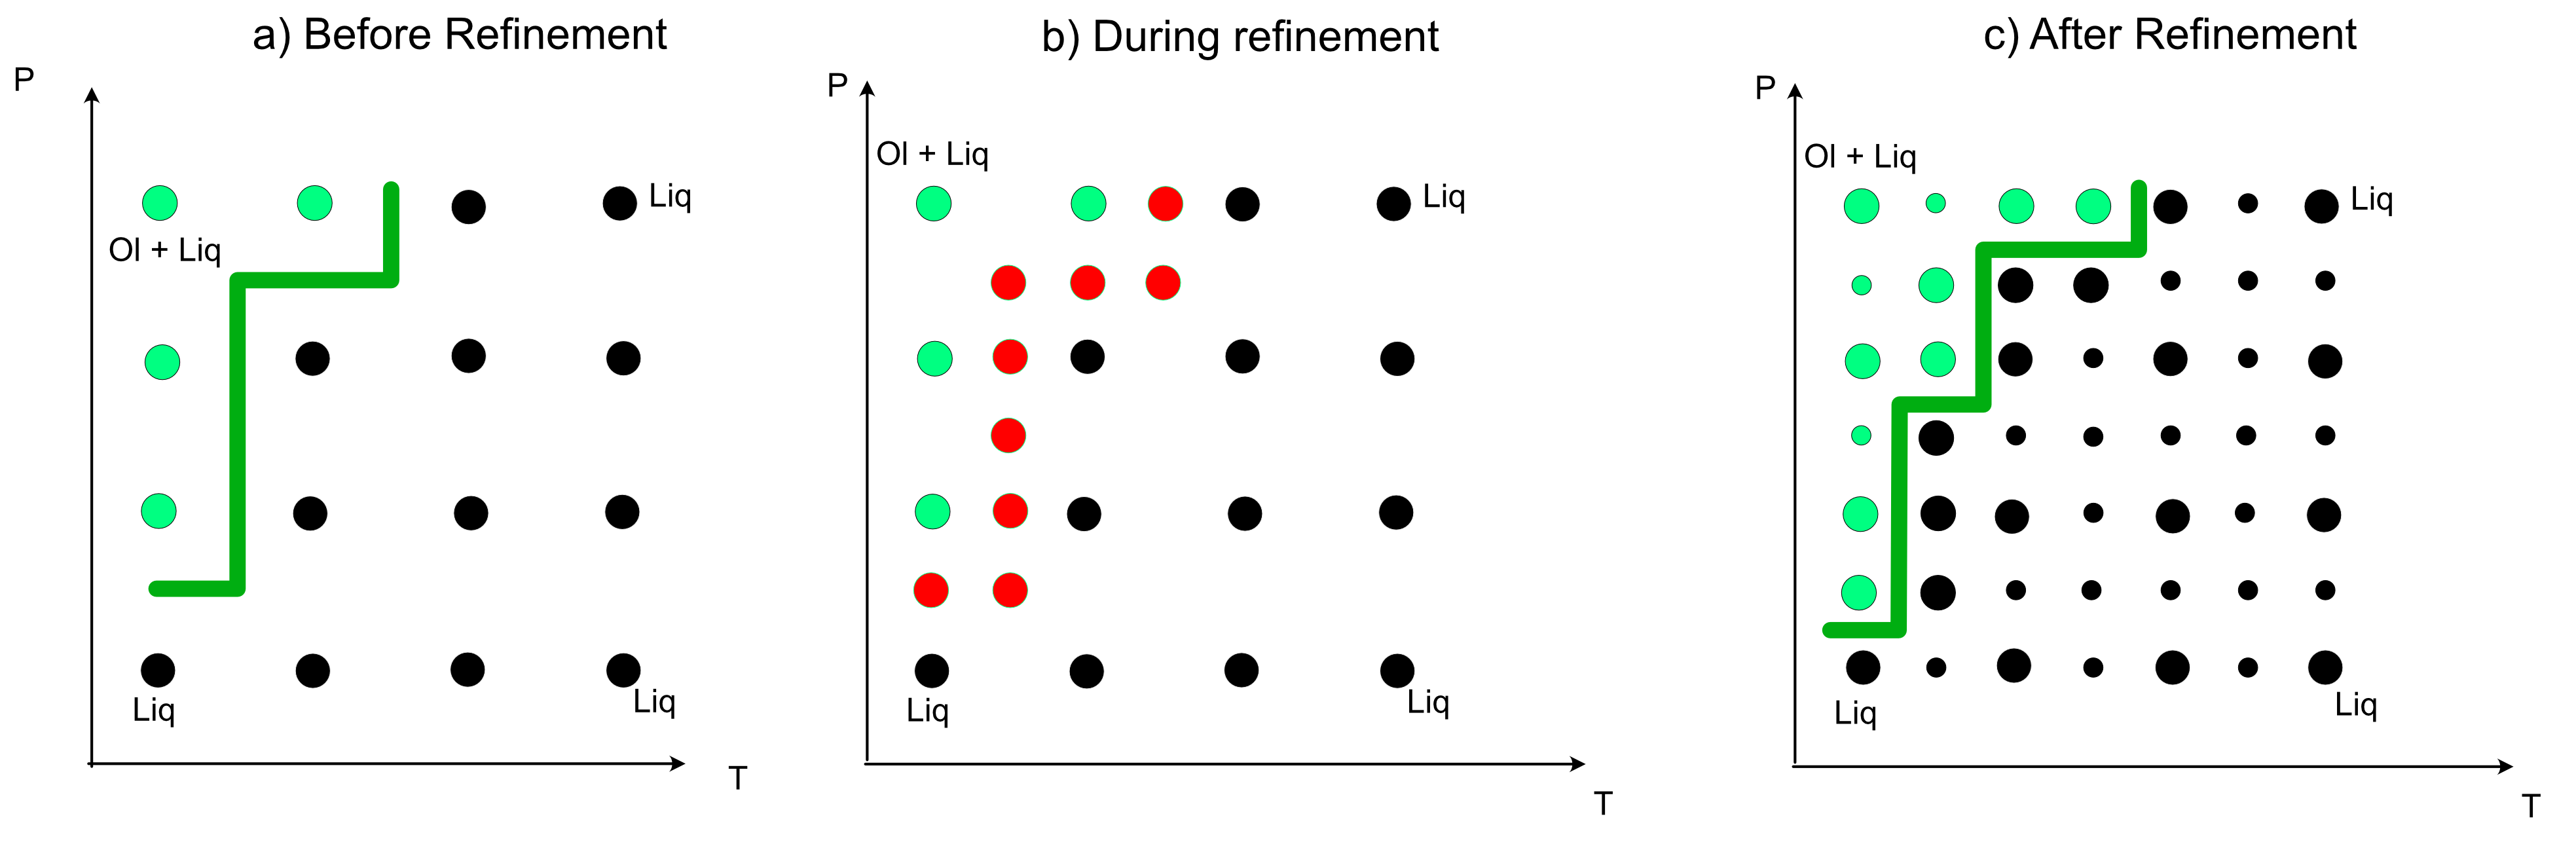
What the first refine step does is insert a new calculation anywhere two neighbouring points have a different phase assemble (the red dots). These are then solved, and the position of the phase boundary is obtained at a higher precision. To ensure that the matrix has a constant point spacing, new points are inserted between existing points with the same phase (e.g. the point between Ol - Ol is filled with olivine - in this diagram, these are the smaller circles in panel c). refine=2 would do this again after the first refinement stage. 

In [32]:
Res_pMELTS = ptt.phaseDiagram_calc(Model = "pMELTS", bulk = Prim_MELT, 
                            P_bar = np.linspace(200.0,15000.0, 25),
                            T_C = np.linspace(1150.0, 1450.0, 25),
                            i_max = 15,
                            refine = 2)

Attempt 0
Attempt 0
Attempt 0


In [33]:
Res_pMELTS

,T_C,P_bar,mass_g,h_J,s_J/K,v_cm3,rho_kg/m3,log10(fO2),dvdp_cm3/bar,SiO2_Liq,...,h_J_Plag,s_J/K_Plag,cp_J/kg/K_Plag,dcpdt_J/K_Plag,dvdt_cm3/K_Plag,dpdt_bar/K_Plag,d2vdt2_cm3/K2_Plag,d2vdtdp_cm3/bar.K_Plag,d2vdp2_cm3/bar2_Plag,molwt_Plag
0,1150.0,200.00,100.0,-1.248859e+06,255.862662,35.541637,2813.601422,-8.208987,0.000353,53.637599,...,-4055.510668,0.701873,1227.622241,0.000035,0.000003,NaN,8.456372e-10,0.0,7.925588e-13,273.791174
1,1150.0,354.17,100.0,-1.248532e+06,255.708136,35.507705,2816.297855,-8.175625,0.000360,53.697914,...,-9315.357520,1.615936,1227.626545,0.000079,0.000006,NaN,1.940876e-09,0.0,1.835080e-12,273.722894
2,1150.0,508.33,100.0,-1.248206e+06,255.553609,35.473774,2818.994287,-8.142263,0.000368,53.758228,...,-14575.204372,2.529999,1227.630849,0.000124,0.000009,NaN,3.036115e-09,0.0,2.877602e-12,273.654613
3,1150.0,662.50,100.0,-1.247879e+06,255.399083,35.439842,2821.690719,-8.108900,0.000376,53.818543,...,-19835.051223,3.444063,1227.635154,0.000168,0.000013,NaN,4.131354e-09,0.0,3.920124e-12,273.586332
4,1150.0,816.67,100.0,-1.247552e+06,255.244556,35.405911,2824.387152,-8.075538,0.000383,53.878858,...,-25094.898075,4.358126,1227.639458,0.000213,0.000016,NaN,5.226593e-09,0.0,4.962645e-12,273.518051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9404,1450.0,14383.33,100.0,-1.144643e+06,290.385564,34.672850,2884.100960,-5.168325,0.000004,48.107772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9405,1450.0,14537.50,100.0,-1.144694e+06,290.046490,34.619078,2888.601626,-5.153195,0.000019,48.025197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9406,1450.0,14691.67,100.0,-1.144745e+06,289.707416,34.565307,2893.102291,-5.138066,0.000033,47.942621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9407,1450.0,14845.83,100.0,-1.144797e+06,289.368342,34.511535,2897.602957,-5.122936,0.000048,47.860045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The result is a DataFrame with 97 equally spaced temperature and pressure values (so total size of 97*97).
Why 97 you ask? Well initially its 25 in x and 25 in y. The refine then adds 24 points (one inbetween each point), so 49X49. The refine again adds another 48 points so (49+48) = 97 X 97.  For cases where the phase assemblage of 2 neighboring points was identical the phase proportions and phase chemistry is estimated through simply linear interpolation between the two neighbors. To view the phase diagram results we can use the `plot_phaseDiagram` function in `ptt`. This will create a phase diagram labelled by number, with each number corresponding to a phase assemblage listed on the right. By using `%matplotlib widget` above you should be able to hover over the plot and see which number (and therefore phase assemblage) is present at each P-T condition.

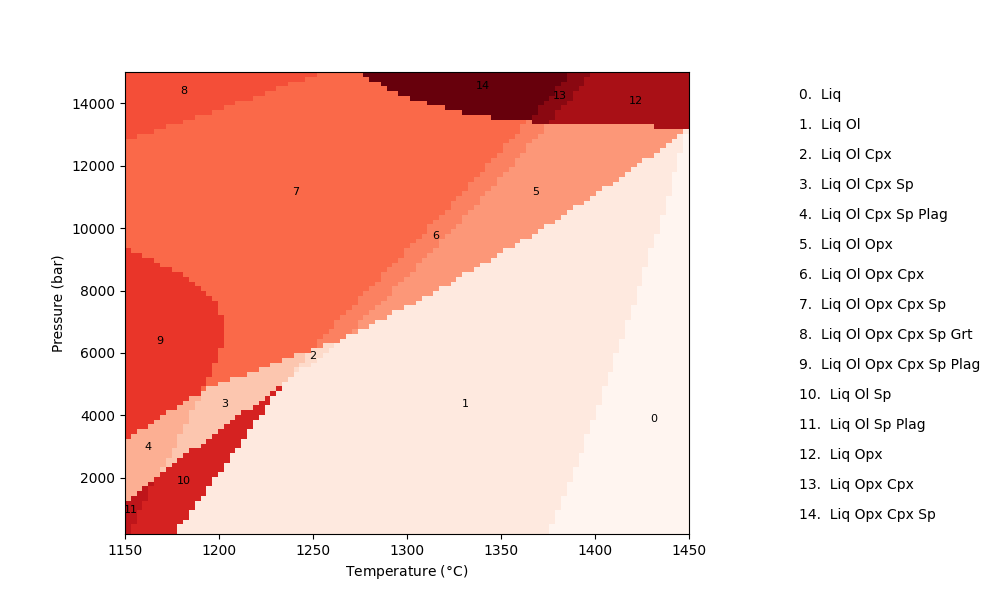

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: xlabel='Temperature ($\\degree$C)', ylabel='Pressure (bar)'>,
        <Axes: >], dtype=object))

In [34]:
ptt.plot_phaseDiagram(Combined = Res_pMELTS)

## Lets try Melts V.1.0.2

In [49]:
Res_M12 = ptt.phaseDiagram_calc(Model = "MELTSv1.0.2", bulk = Prim_MELT, 
                            P_bar = np.linspace(200.0,15000.0, 25),
                            T_C = np.linspace(1150.0, 1450.0, 25),
                            i_max = 15,
                            refine = 2)

Attempt 0
Attempt 1
Attempt 2
Attempt 3
Attempt 4
Attempt 5
Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11
Attempt 12
Attempt 13
Attempt 14
Attempt 15
Attempt 0
Attempt 1
Attempt 2
Attempt 3
Attempt 4
Attempt 5
Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11
Attempt 12
Attempt 13
Attempt 14
Attempt 15
Attempt 0
Attempt 1
Attempt 2
Attempt 3
Attempt 4
Attempt 5
Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11
Attempt 12
Attempt 13
Attempt 14
Attempt 15


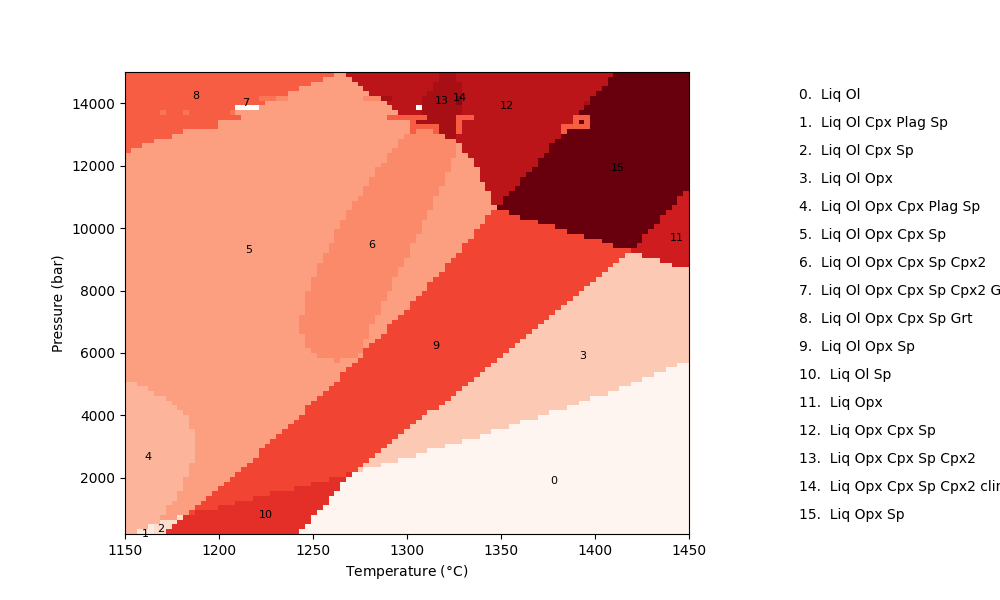

In [50]:
f, a = ptt.plot_phaseDiagram(Combined = Res_M12)

#### Calculations using MAGEMin

For calculations with MAGEMin it is important to note that this is one of the major purposes for which the original MAGEMin code was developed, so it will likely always be straightforward to create phase diagrams using the MAGEMinApp (https://github.com/ComputationalThermodynamics/MAGEMinApp.jl). The point of this code is not to try and replace MAGEMin, but to provide Python users with the ability to perform calcualtions with a range of different thermodynamic models.  In the cells below we repeat the calculations with the `Model` kwarg is changed to `Green2025` which will initiate the calculation in julia via MAGEMin

In [35]:
Res_green = ptt.phaseDiagram_calc(Model = "Green2025", bulk = Prim_MELT, 
                            P_bar = np.linspace(200.0,15000.0, 25),
                            T_C = np.linspace(1150.0, 1450.0, 25),
                            i_max = 15, refine=2)

Attempt 0
Attempt 0
Attempt 0


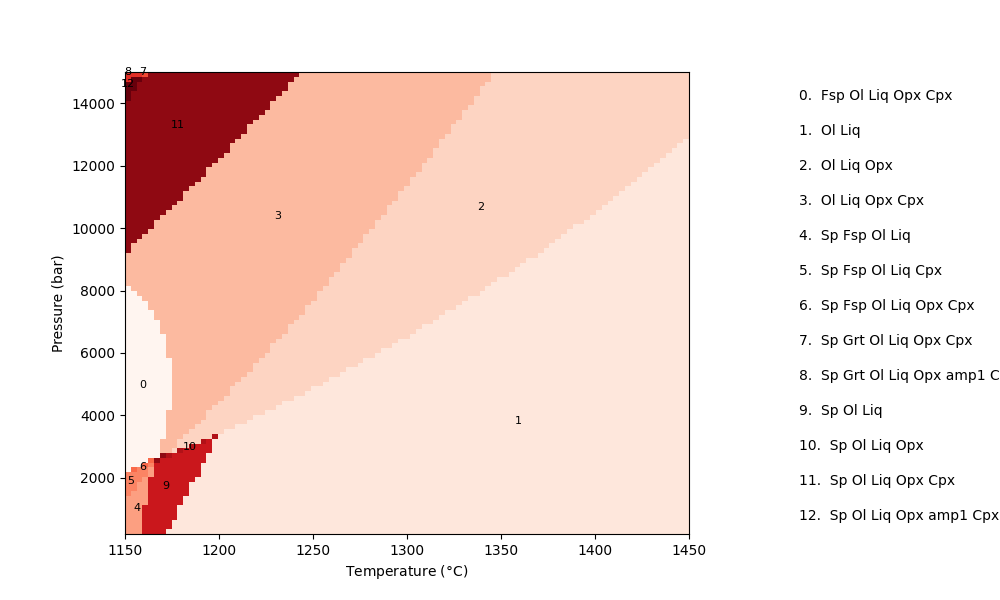

In [36]:
f, a = ptt.plot_phaseDiagram(Combined = Res_green)

## Lets calculate Mg# as that was a big part of the original arguements

In [69]:
Res_green['Mg#_Opx']=(Res_green['MgO_Opx']/40.3044)/((Res_green['MgO_Opx']/40.3044)+(Res_green['FeOt_Opx']/71.844))
Res_M12['Mg#_Opx']=(Res_M12['MgO_Opx']/40.3044)/((Res_M12['MgO_Opx']/40.3044)+(Res_M12['FeOt_Opx']/71.844))
Res_pMELTS['Mg#_Opx']=(Res_pMELTS['MgO_Opx']/40.3044)/((Res_pMELTS['MgO_Opx']/40.3044)+(Res_pMELTS['FeOt_Opx']/71.844))

### Extracting more information from the phase diagram calculations

In addition to the phase diagrams shown above it is relatively simple to extract additional information from the calculations. For example, it is trivial to extract the mass of liquid (mass fraction) at each point and reshape this array into a P-T grid so that we can visualize this data as contours.

The function make_grid_variables_from_phase_diagram takes your dataframe output, and puts it into a PT grid. This allows for easier plotting. 

In [99]:
X_green, Y_green, Z_green = ptt.make_grid_variables_from_phase_diagram(
    Results = Res_green,
    x_col = "T_C",
    y_col = "P_bar",
)

liq_green = Z_green["mass_g_Liq"]


In [71]:
X_pMELTS, Y_pMELTS, Z_pMELTS = ptt.make_grid_variables_from_phase_diagram(
    Results = Res_pMELTS,
    x_col = "T_C",
    y_col = "P_bar",
)


In [72]:
X_M12, Y_M12, Z_M12 = ptt.make_grid_variables_from_phase_diagram(
    Results = Res_M12,
    x_col = "T_C",
    y_col = "P_bar",
)


From here we can use the `plt.contourf` function to visualize the mass fraction of melt at each P-T value:

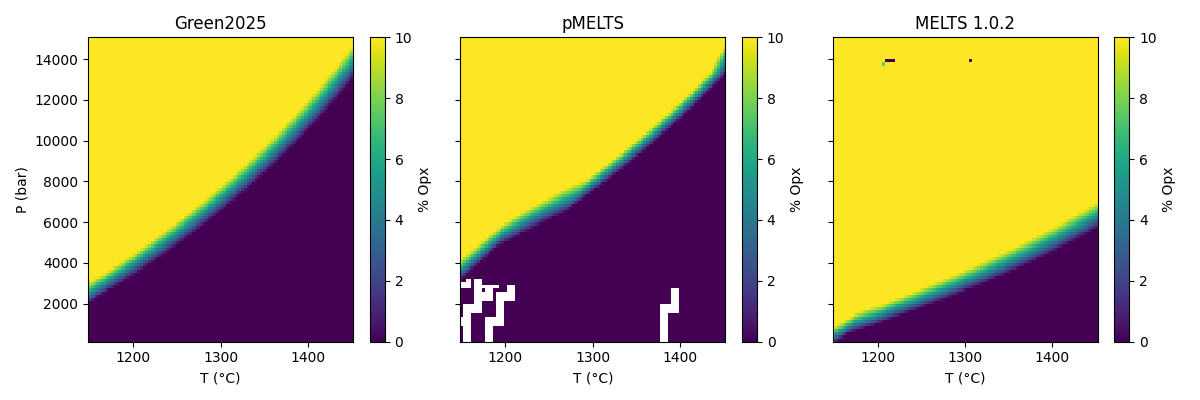

In [102]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 4), sharex=True, sharey=True
)

# ------------------------------------------------
# Panel 1: Opx in Green
pcm1 = ax1.pcolormesh(
    X_green, Y_green, Z_green["mass_g_Opx"],
    shading="auto",
    cmap="viridis", vmin=0, vmax=10,
)
ax1.set_title("Green2025")
ax1.set_xlabel("T (°C)")
ax1.set_ylabel("P (bar)")
fig.colorbar(pcm1, ax=ax1, label="% Opx")

# ------------------------------------------------
# Panel 2: Opx in pMELTS

pcm2 = ax2.pcolormesh(
    X_MELTS, Y_MELTS, Z_MELTS["mass_g_Opx"],
    shading="auto",
    cmap="viridis", vmin=0, vmax=10,
)
ax2.set_title("pMELTS")
ax2.set_xlabel("T (°C)")
fig.colorbar(pcm2, ax=ax2, label="% Opx")

# ------------------------------------------------
# Panel 3: Opx in v1.0.2

pcm3 = ax3.pcolormesh(
    X_M12, Y_M12, Z_M12["mass_g_Opx"],
    shading="auto",
    cmap="viridis", vmin=0, vmax=10,
)
ax3.set_title("MELTS 1.0.2")
ax3.set_xlabel("T (°C)")
fig.colorbar(pcm3, ax=ax3, label="% Opx")

plt.tight_layout()
plt.show()


## We can also plot the P-T conditions where Ol and Opx are stable (the observed phase assemblage)

In [76]:
Res_green_Opx_Ol=Res_green.loc[(Res_green['mass_g_Ol']>0) & (Res_green['mass_g_Opx']>0) ]
Res_green_Opx=Res_green.loc[(Res_green['mass_g_Opx']>0) ]


Res_pMELTS_Opx_Ol=Res_green.loc[(Res_pMELTS['mass_g_Ol']>0) & (Res_pMELTS['mass_g_Opx']>0 )]
Res_pMELTS_Opx=Res_green.loc[(Res_pMELTS['mass_g_Opx']>0 )]


Res_M12_Opx_Ol=Res_green.loc[(Res_M12['mass_g_Ol']>0) & (Res_M12['mass_g_Opx']>0 )]
Res_M12_Opx=Res_green.loc[ (Res_M12['mass_g_Opx']>0 )]




Text(0, 0.5, 'P (bar)')

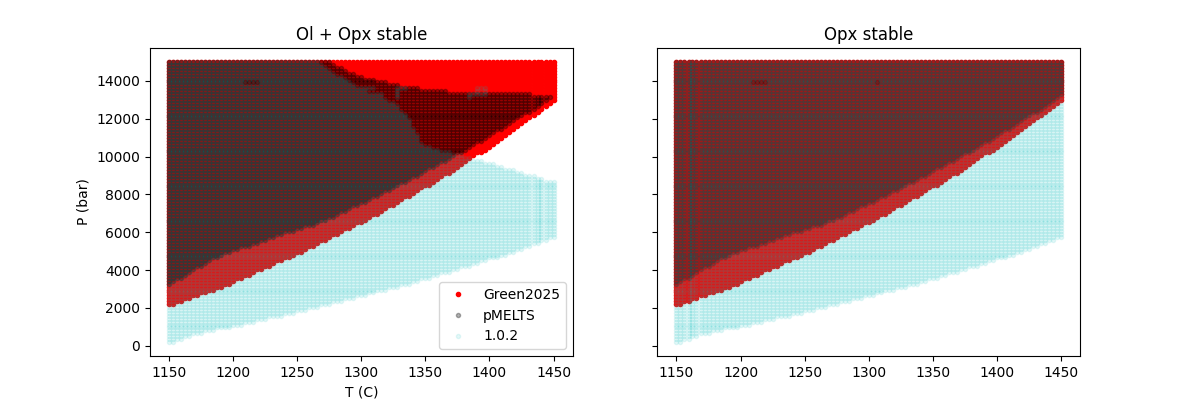

In [104]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12, 4), sharex=True, sharey=True
)

# ------------------------------------------------
# Panel 1: Opx + Ol in Green
ax1.set_title('Ol + Opx stable')

ax1.plot(Res_green_Opx_Ol['T_C'], Res_green_Opx_Ol['P_bar'], '.r', label='Green2025')

ax1.plot(Res_pMELTS_Opx_Ol['T_C'], Res_pMELTS_Opx_Ol['P_bar'], '.k', alpha=0.3, label='pMELTS')

ax1.plot(Res_M12_Opx_Ol['T_C'], Res_M12_Opx_Ol['P_bar'], '.c', alpha=0.1, label='1.0.2')

# Lets just do Opx stable
# Panel 2: Opx stable
ax2.set_title('Opx stable')

ax2.plot(Res_green_Opx['T_C'], Res_green_Opx['P_bar'], '.r')

ax2.plot(Res_pMELTS_Opx['T_C'], Res_pMELTS_Opx['P_bar'], '.k', alpha=0.2)
ax2.plot(Res_M12_Opx['T_C'], Res_M12_Opx['P_bar'], '.c', alpha=0.1)
ax1.legend()
ax1.set_xlabel('T (C)')
ax1.set_ylabel('P (bar)')

Text(0, 0.5, 'P (bar)')

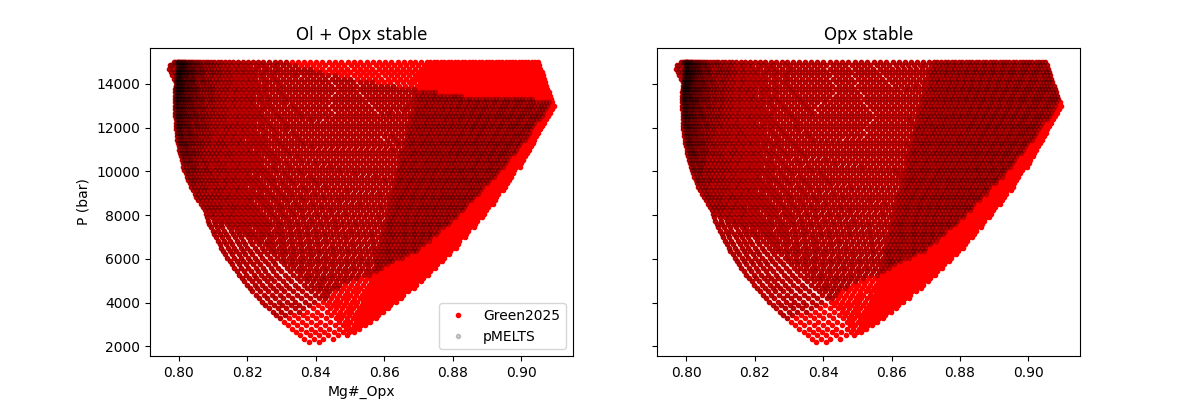

In [85]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12, 4), sharex=True, sharey=True
)

# ------------------------------------------------
# Panel 1: Opx + Ol in Green
ax1.set_title('Ol + Opx stable')

ax1.plot(Res_green_Opx_Ol['Mg#_Opx'], Res_green_Opx_Ol['P_bar'], '.r', label='Green2025')

ax1.plot(Res_pMELTS_Opx_Ol['Mg#_Opx'], Res_pMELTS_Opx_Ol['P_bar'], '.k', alpha=0.2, label='pMELTS')
#ax1.plot(Res_M12_Opx_Ol['Mg#_Opx'], Res_M12_Opx_Ol['P_bar'], '.c', alpha=0.2)
ax1.legend()
# Lets just do Opx stable
# Panel 2: Opx stable
ax2.set_title('Opx stable')

ax2.plot(Res_green_Opx['Mg#_Opx'], Res_green_Opx['P_bar'], '.r')

ax2.plot(Res_pMELTS_Opx['Mg#_Opx'], Res_pMELTS_Opx['P_bar'], '.k', alpha=0.2)
#ax2.plot(Res_M12_Opx['Mg#_Opx'], Res_M12_Opx['P_bar'], '.c', alpha=0.1)
ax1.legend()
ax1.set_xlabel('Mg#_Opx')
ax1.set_ylabel('P (bar)')

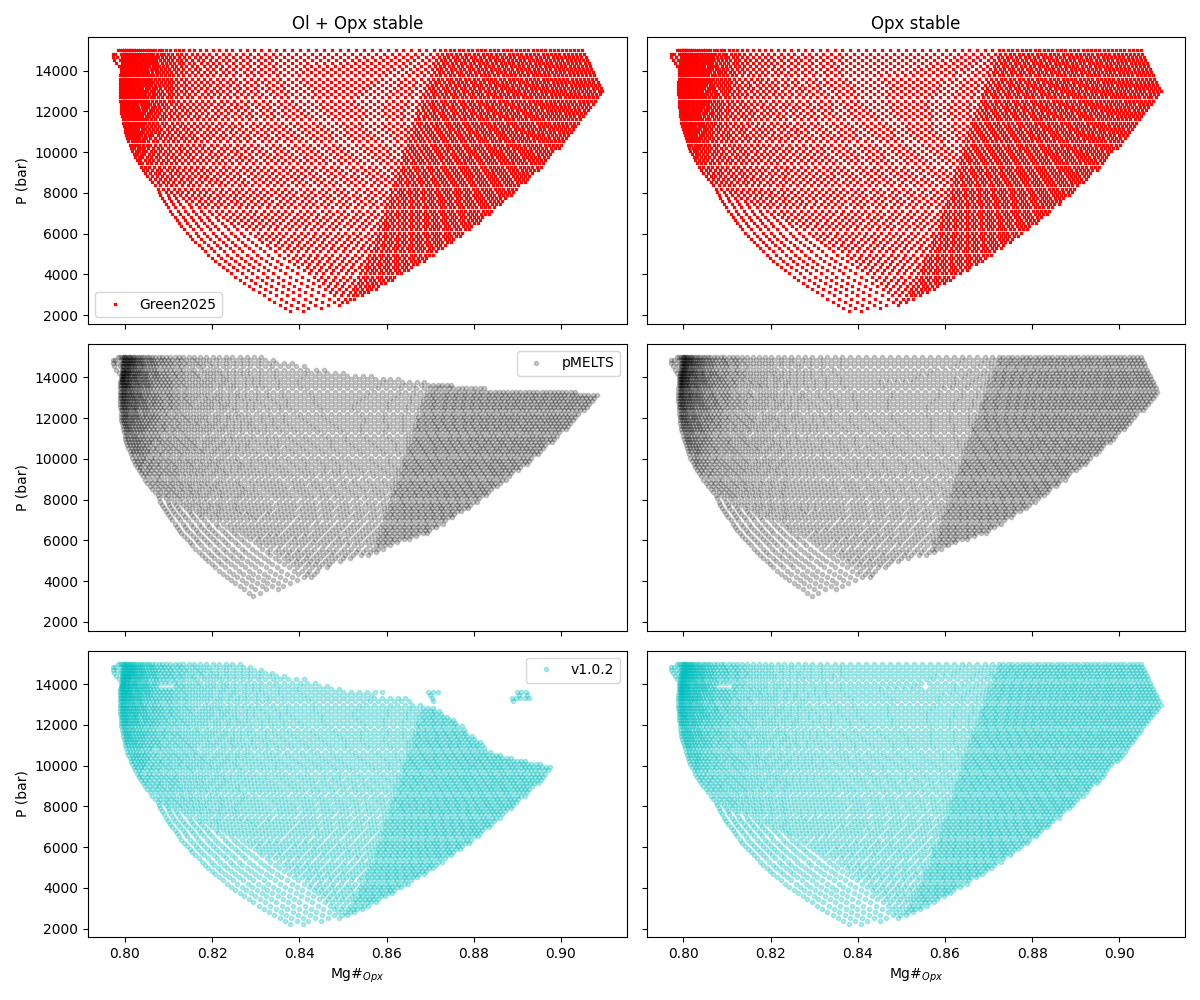

In [105]:
fig, axes = plt.subplots(
    3, 2, figsize=(12, 10), sharex=True, sharey=True
)

# =================================================
# Row 1 — Green2025
# =================================================
axes[0, 0].set_title('Ol + Opx stable')
axes[0, 0].plot(
    Res_green_Opx_Ol['Mg#_Opx'],
    Res_green_Opx_Ol['P_bar'],
    'xr', ms=2, label='Green2025'
)
axes[0, 0].legend()

axes[0, 1].set_title('Opx stable')
axes[0, 1].plot(
    Res_green_Opx['Mg#_Opx'],
    Res_green_Opx['P_bar'],
    'xr', ms=2
)

# =================================================
# Row 2 — pMELTS
# =================================================
axes[1, 0].plot(
    Res_pMELTS_Opx_Ol['Mg#_Opx'],
    Res_pMELTS_Opx_Ol['P_bar'],
    '.k', alpha=0.2, label='pMELTS'
)
axes[1, 0].legend()

axes[1, 1].plot(
    Res_pMELTS_Opx['Mg#_Opx'],
    Res_pMELTS_Opx['P_bar'],
    '.k', alpha=0.2
)

# =================================================
# Row 3 — MELTS v1.2.0
# =================================================
axes[2, 0].plot(
    Res_M12_Opx_Ol['Mg#_Opx'],
    Res_M12_Opx_Ol['P_bar'],
    '.c', alpha=0.3, label='v1.0.2'
)
axes[2, 0].legend()

axes[2, 1].plot(
    Res_M12_Opx['Mg#_Opx'],
    Res_M12_Opx['P_bar'],
    '.c', alpha=0.3
)

# =================================================
# Labels
# =================================================
for ax in axes[:, 0]:
    ax.set_ylabel('P (bar)')

for ax in axes[-1, :]:
    ax.set_xlabel('Mg#$_{Opx}$')

plt.tight_layout()
